In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split

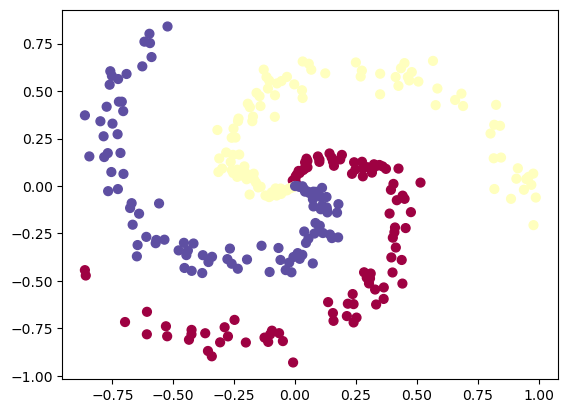

In [14]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [16]:
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

scores = np.dot(X, W) + b

num_examples = X.shape[0]
exp_scores = np.exp(scores)
probs = scores / np.sum(exp_scores, axis=1, keepdims=True)

In [22]:
print(scores.shape) 
print(num_examples)
print(exp_scores.shape)
print(probs.shape)

(300, 3)
300
(300, 3)
(300, 3)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.85101901e-05  5.86538309e-07  1.64065394e-05]
 [-1.42032699e-04 -1.14068074e-05  2.31821093e-05]
 [-2.12065937e-04 -8.36787583e-05 -2.25758160e-05]
 [-2.89440588e-04 -4.51032877e-05  2.84857605e-05]
 [-3.61092733e-04 -5.21695549e-05  3.90549637e-05]
 [-4.28263751e-04 -4.10770308e-05  6.41655597e-05]
 [-4.79390440e-04  4.78885538e-06  1.15389926e-04]
 [-5.62900473e-04 -2.97078563e-05  1.05174332e-04]
 [-5.87454238e-04  5.79022595e-05  1.86049992e-04]
 [-6.43108884e-04  7.90353104e-05  2.17102817e-04]
 [-6.80896564e-04  1.23705481e-04  2.64204790e-04]
 [-7.85069540e-04  7.45163792e-05  2.46178513e-04]
 [-8.72768629e-04  4.31733235e-05  2.39641396e-04]
 [-9.19450544e-04  8.14032296e-05  2.83281758e-04]
 [-1.00883922e-03  4.67243948e-05  2.74274496e-04]
 [-8.57010234e-04  3.27234492e-04  4.79729041e-04]
 [-9.46152119e-04  3.12750107e-04  4.87992834e-04]
 [-1.06613371e-03  2.61542944e-04  4.71904557e-04]


In [ ]:
correct_logprobs = -np.log(probs[range(num_examples), y])
